In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score, fbeta_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.over_sampling import ADASYN
import time

In [ ]:
# Dataset source: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [ ]:
diabetes_df = pd.read_csv("diabetes_prediction_dataset.csv")
diabetes_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## Data Exploration Steps to Do:

1. Check for any null values
2. Create data visualizations (histograms, box plots, bar graphs, etc.) to investigate distributions of the data


*   Overall Distribution of Data
*   Distribution of Data for Diabetics
*   Distribution of Data for Non-Diabetics

3. Create data visualization of people who have heart diesease of diabetes vs no diabetes





In [ ]:
diabetes_df.isna().any()

gender                 False
age                    False
hypertension           False
heart_disease          False
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
diabetes               False
dtype: bool

Text(0, 0.5, 'Frequency')

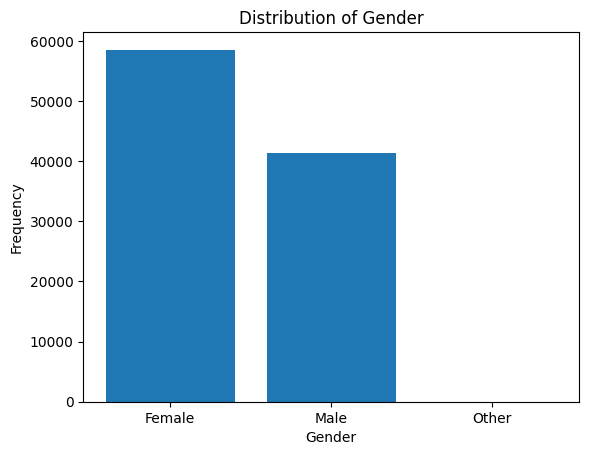

In [ ]:
gender_group = diabetes_df.groupby(['gender'])['heart_disease'].count()
plt.bar(gender_group.index, list(gender_group))
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

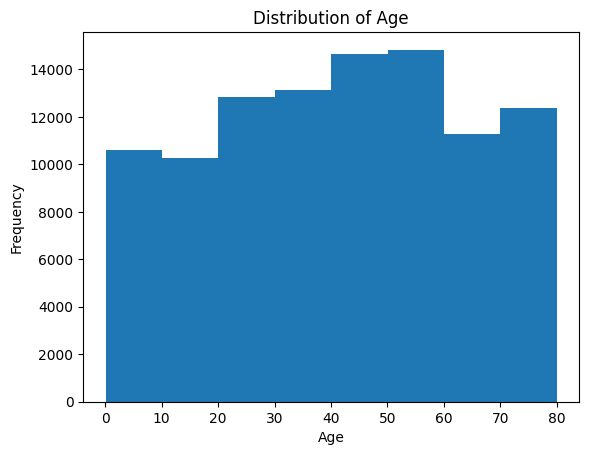

In [ ]:
plt.hist(diabetes_df['age'], bins=8)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0.5, 0, 'Age')

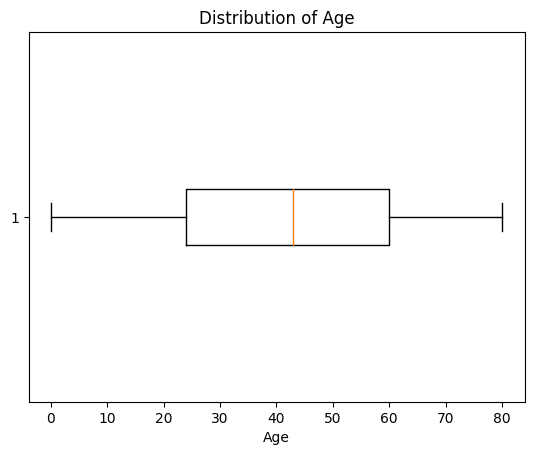

In [ ]:
plt.boxplot(diabetes_df['age'], vert=False)
plt.title('Distribution of Age')
plt.xlabel('Age')

Text(0, 0.5, 'Frequency')

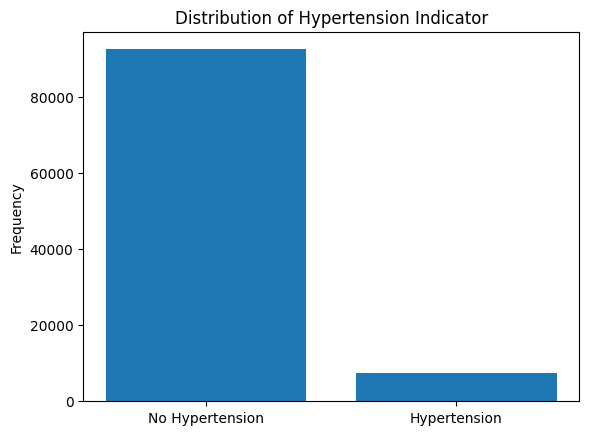

In [ ]:
hypertension_group = diabetes_df.groupby(['hypertension'])['heart_disease'].count()
plt.bar([0, 1], list(hypertension_group), tick_label=['No Hypertension', 'Hypertension'], align='center')
plt.title('Distribution of Hypertension Indicator')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

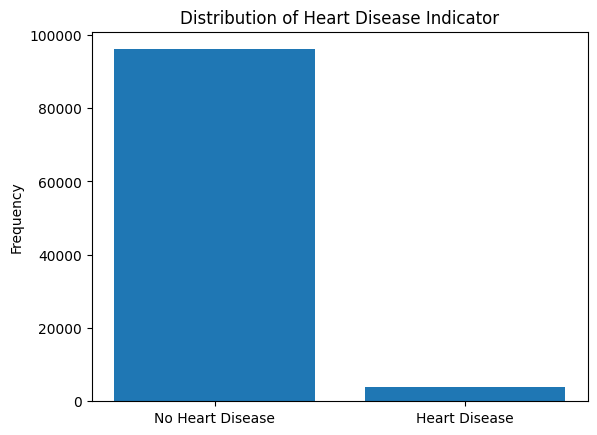

In [ ]:
heart_disease_group = diabetes_df.groupby(['heart_disease'])['diabetes'].count()
plt.bar([0, 1], list(heart_disease_group), tick_label=['No Heart Disease', 'Heart Disease'], align='center')
plt.title('Distribution of Heart Disease Indicator')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

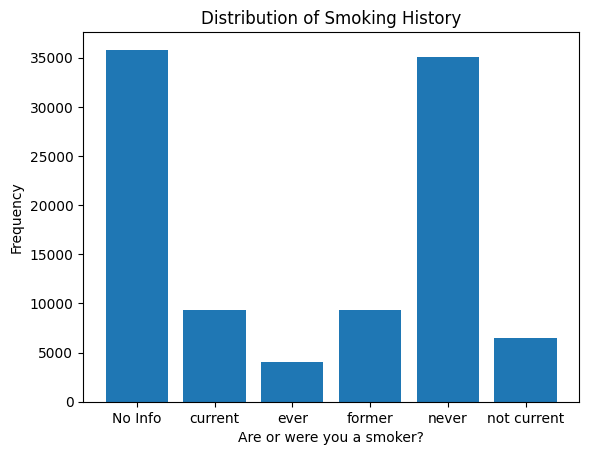

In [ ]:
smoking_group = diabetes_df.groupby(['smoking_history'])['heart_disease'].count()
plt.bar(smoking_group.index, list(smoking_group))
plt.title('Distribution of Smoking History')
plt.xlabel('Are or were you a smoker?')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

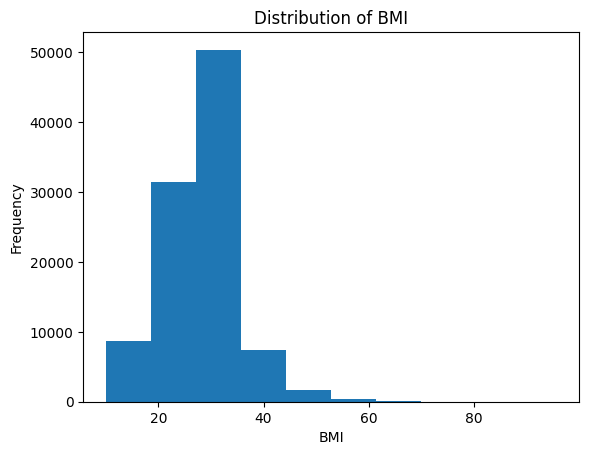

In [ ]:
plt.hist(diabetes_df['bmi'])
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

Text(0.5, 0, 'BMI')

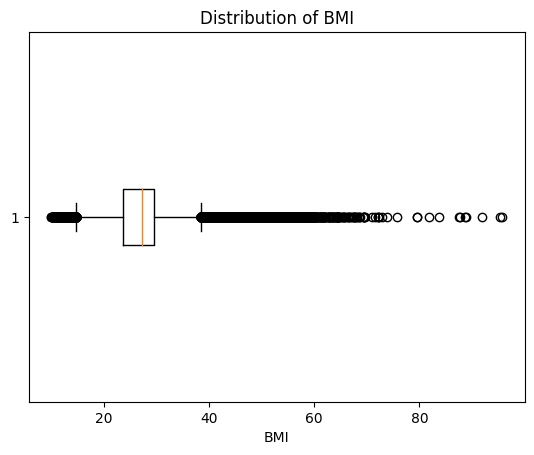

In [ ]:
plt.boxplot(diabetes_df['bmi'], vert=False)
plt.title('Distribution of BMI')
plt.xlabel('BMI')

Text(0, 0.5, 'Frequency')

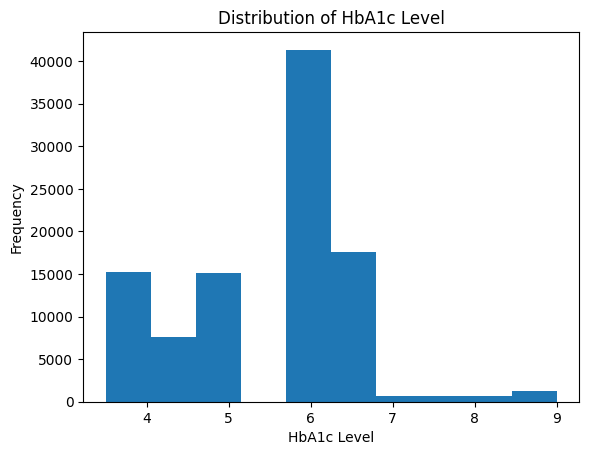

In [ ]:
plt.hist(diabetes_df['HbA1c_level'])
plt.title('Distribution of HbA1c Level')
plt.xlabel('HbA1c Level')
plt.ylabel('Frequency')

Text(0.5, 0, 'HbA1c Level')

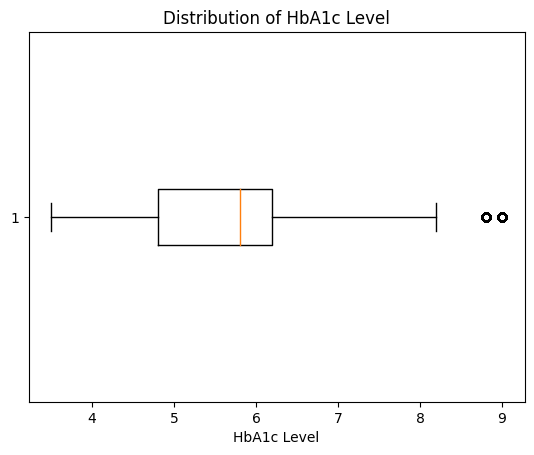

In [ ]:
plt.boxplot(diabetes_df['HbA1c_level'], vert=False)
plt.title('Distribution of HbA1c Level')
plt.xlabel('HbA1c Level')

Text(0, 0.5, 'Frequency')

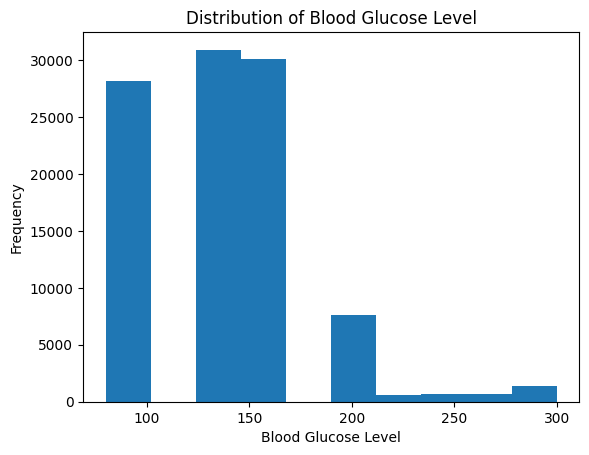

In [ ]:
plt.hist(diabetes_df['blood_glucose_level'])
plt.title('Distribution of Blood Glucose Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Frequency')

Text(0.5, 0, 'Blood Glucose Level')

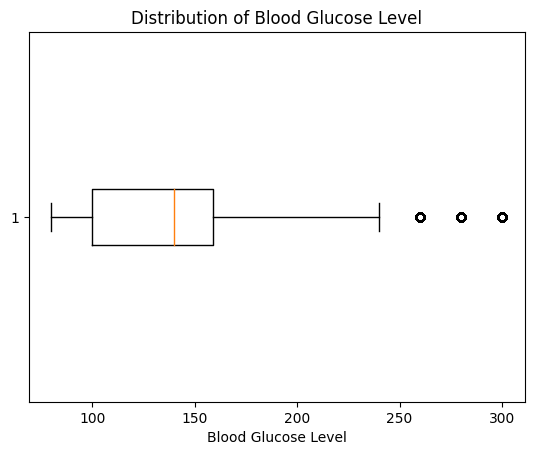

In [ ]:
plt.boxplot(diabetes_df['blood_glucose_level'], vert=False)
plt.title('Distribution of Blood Glucose Level')
plt.xlabel('Blood Glucose Level')

Text(0, 0.5, 'Frequency')

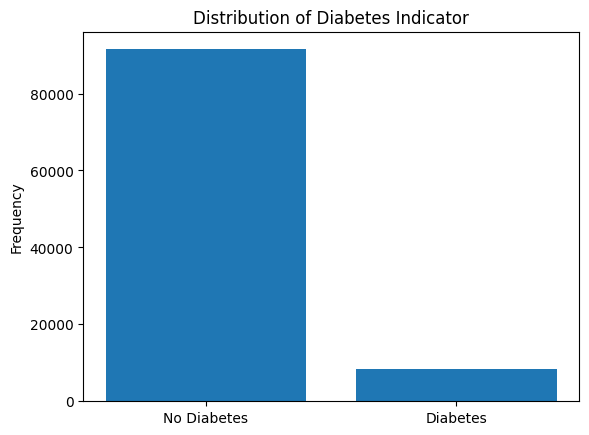

In [ ]:
diabetes_group = diabetes_df.groupby(['diabetes'])['heart_disease'].count()
plt.bar([0, 1], list(diabetes_group), tick_label=['No Diabetes', 'Diabetes'], align='center')
plt.title('Distribution of Diabetes Indicator')
plt.ylabel('Frequency')

In [ ]:
diabetics_group = diabetes_df[diabetes_df['diabetes'] == 1]
diabetics_group

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,Female,44.0,0,0,never,19.31,6.5,200,1
26,Male,67.0,0,1,not current,27.32,6.5,200,1
38,Male,50.0,1,0,current,27.32,5.7,260,1
40,Male,73.0,0,0,former,25.91,9.0,160,1
53,Female,53.0,0,0,former,27.32,7.0,159,1
...,...,...,...,...,...,...,...,...,...
99935,Female,65.0,1,1,never,33.55,8.2,140,1
99938,Male,55.0,0,1,former,30.42,6.2,300,1
99957,Female,61.0,0,0,No Info,34.45,6.5,280,1
99962,Female,58.0,1,0,never,38.31,7.0,200,1


Text(0, 0.5, 'Frequency')

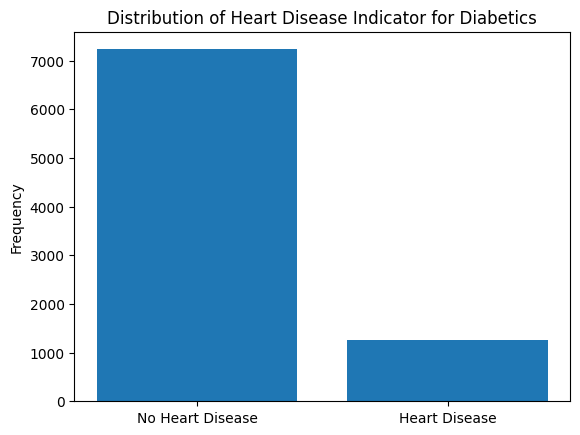

In [ ]:
heart_disease_group_diabetics = diabetics_group.groupby(['heart_disease'])['diabetes'].count()
plt.bar([0, 1], list(heart_disease_group_diabetics), tick_label=['No Heart Disease', 'Heart Disease'], align='center')
plt.title('Distribution of Heart Disease Indicator for Diabetics')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

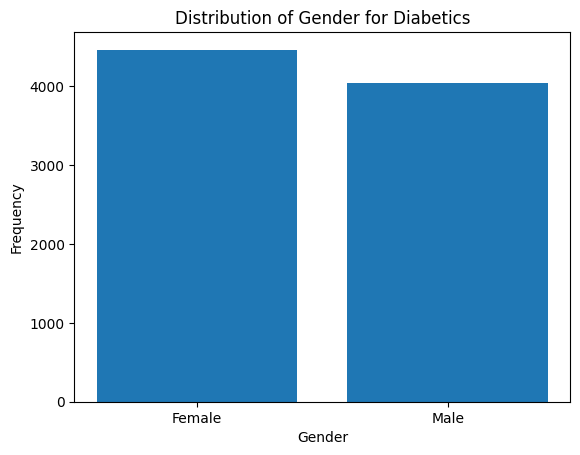

In [ ]:
gender_group_diabetics = diabetics_group.groupby(['gender'])['heart_disease'].count()
plt.bar(gender_group_diabetics.index, list(gender_group_diabetics))
plt.title('Distribution of Gender for Diabetics')
plt.xlabel('Gender')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

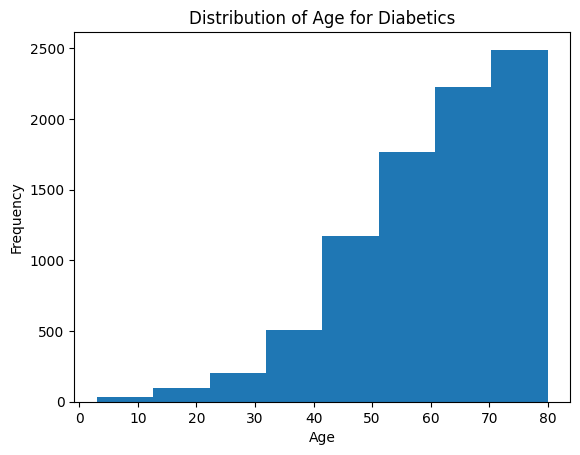

In [ ]:
plt.hist(diabetics_group['age'], bins=8)
plt.title('Distribution of Age for Diabetics')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0.5, 0, 'Age')

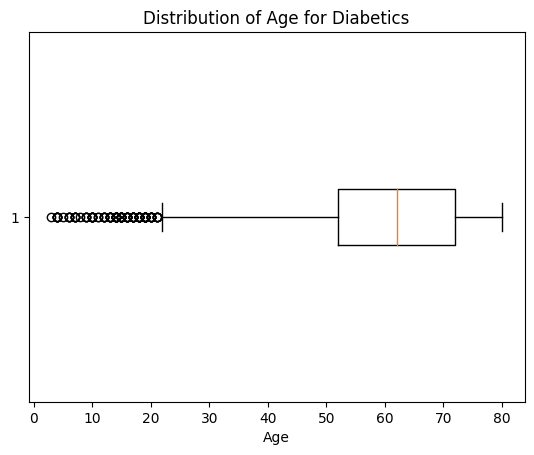

In [ ]:
plt.boxplot(diabetics_group['age'], vert=False)
plt.title('Distribution of Age for Diabetics')
plt.xlabel('Age')

Text(0, 0.5, 'Frequency')

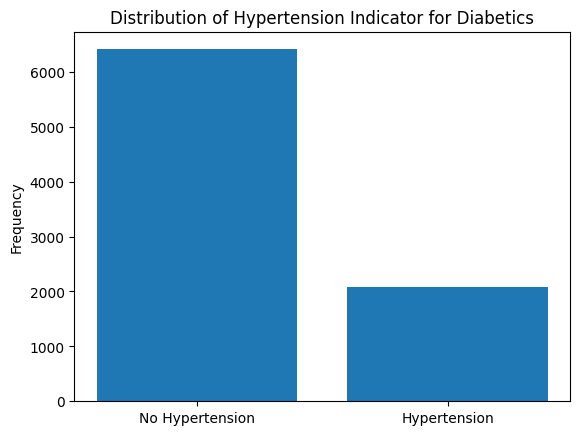

In [ ]:
hypertension_group_diabetics = diabetics_group.groupby(['hypertension'])['heart_disease'].count()
plt.bar([0, 1], list(hypertension_group_diabetics), tick_label=['No Hypertension', 'Hypertension'], align='center')
plt.title('Distribution of Hypertension Indicator for Diabetics')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

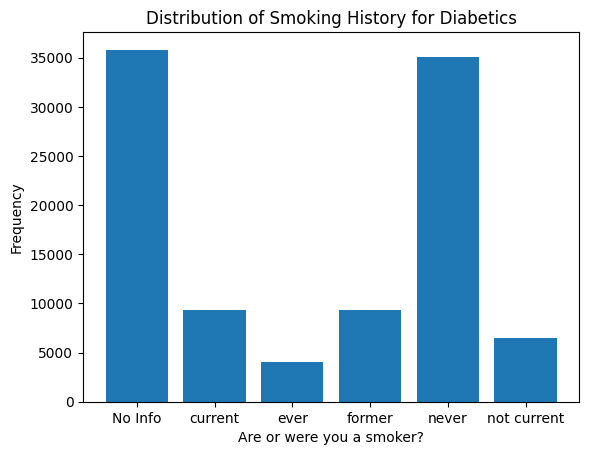

In [ ]:
smoking_group_diabetics = diabetics_group.groupby(['smoking_history'])['heart_disease'].count()
plt.bar(smoking_group_diabetics.index, list(smoking_group))
plt.title('Distribution of Smoking History for Diabetics')
plt.xlabel('Are or were you a smoker?')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

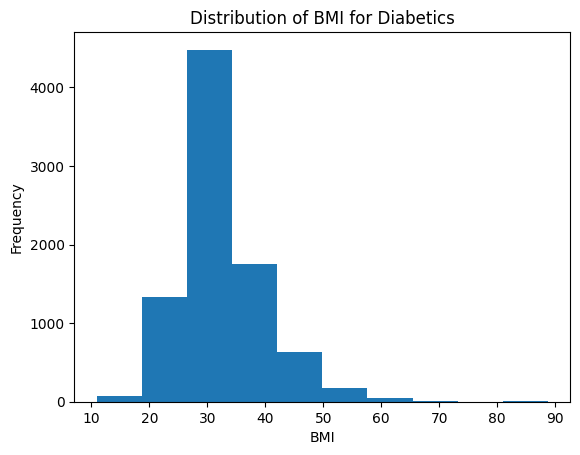

In [ ]:
plt.hist(diabetics_group['bmi'])
plt.title('Distribution of BMI for Diabetics')
plt.xlabel('BMI')
plt.ylabel('Frequency')

Text(0.5, 0, 'BMI')

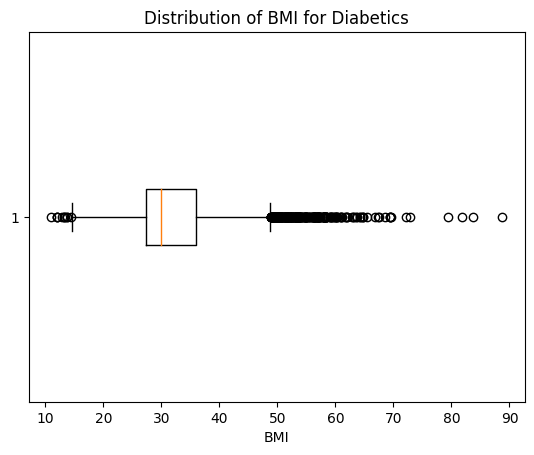

In [ ]:
plt.boxplot(diabetics_group['bmi'], vert=False)
plt.title('Distribution of BMI for Diabetics')
plt.xlabel('BMI')

Text(0, 0.5, 'Frequency')

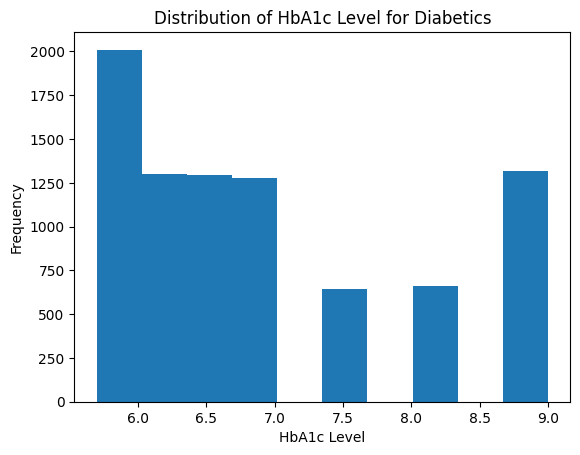

In [ ]:
plt.hist(diabetics_group['HbA1c_level'])
plt.title('Distribution of HbA1c Level for Diabetics')
plt.xlabel('HbA1c Level')
plt.ylabel('Frequency')

Text(0.5, 0, 'HbA1c Level')

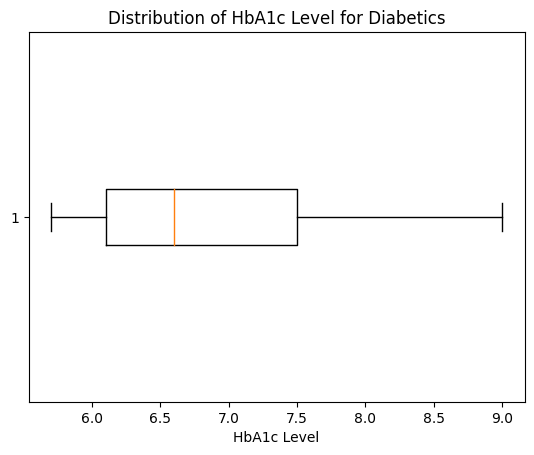

In [ ]:
plt.boxplot(diabetics_group['HbA1c_level'], vert=False)
plt.title('Distribution of HbA1c Level for Diabetics')
plt.xlabel('HbA1c Level')

Text(0, 0.5, 'Frequency')

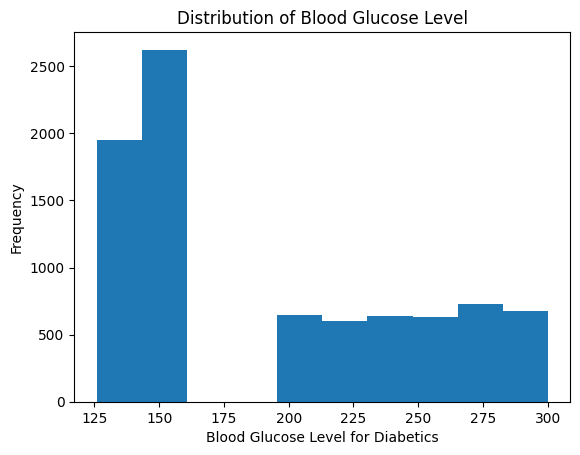

In [ ]:
plt.hist(diabetics_group['blood_glucose_level'])
plt.title('Distribution of Blood Glucose Level')
plt.xlabel('Blood Glucose Level for Diabetics')
plt.ylabel('Frequency')

Text(0.5, 0, 'Blood Glucose Level')

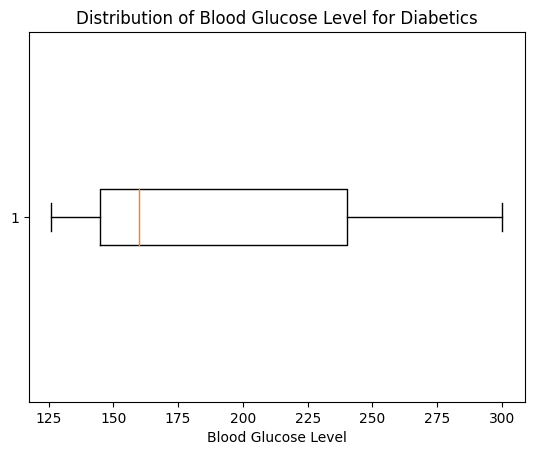

In [ ]:
plt.boxplot(diabetics_group['blood_glucose_level'], vert=False)
plt.title('Distribution of Blood Glucose Level for Diabetics')
plt.xlabel('Blood Glucose Level')

In [ ]:
non_diabetics_group = diabetes_df[diabetes_df['diabetes'] == 0]
non_diabetics_group

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


Text(0, 0.5, 'Frequency')

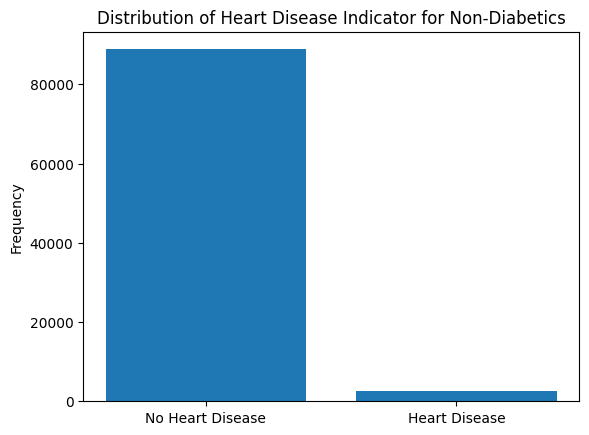

In [ ]:
heart_disease_group_non_diabetics = non_diabetics_group.groupby(['heart_disease'])['diabetes'].count()
plt.bar([0, 1], list(heart_disease_group_non_diabetics), tick_label=['No Heart Disease', 'Heart Disease'], align='center')
plt.title('Distribution of Heart Disease Indicator for Non-Diabetics')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

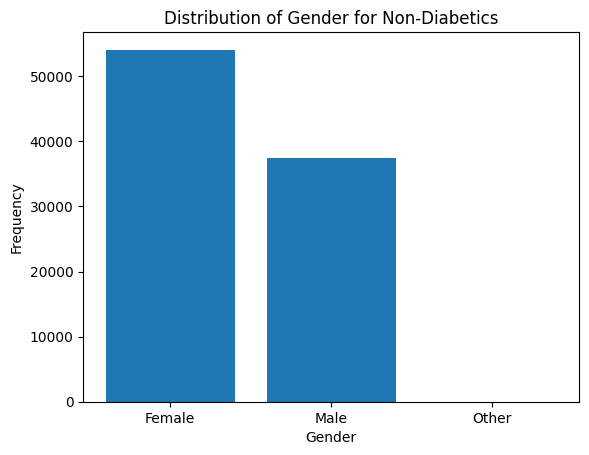

In [ ]:
gender_group_non_diabetics = non_diabetics_group.groupby(['gender'])['heart_disease'].count()
plt.bar(gender_group_non_diabetics.index, list(gender_group_non_diabetics))
plt.title('Distribution of Gender for Non-Diabetics')
plt.xlabel('Gender')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

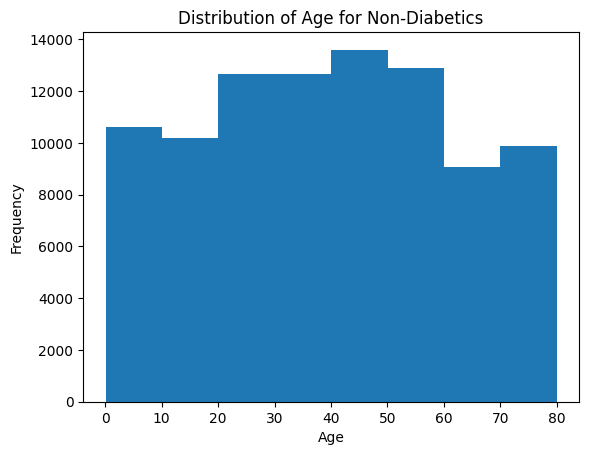

In [ ]:
plt.hist(non_diabetics_group['age'], bins=8)
plt.title('Distribution of Age for Non-Diabetics')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0.5, 0, 'Age')

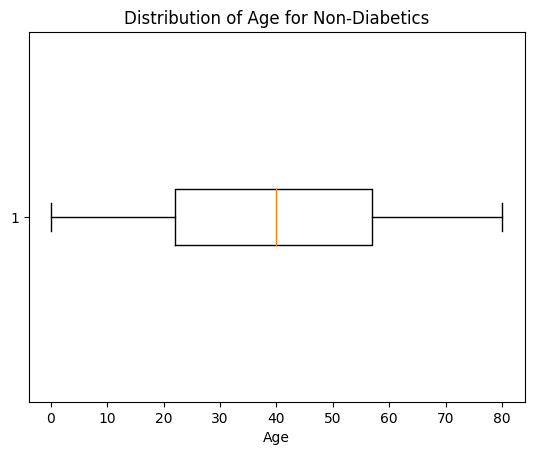

In [ ]:
plt.boxplot(non_diabetics_group['age'], vert=False)
plt.title('Distribution of Age for Non-Diabetics')
plt.xlabel('Age')

Text(0, 0.5, 'Frequency')

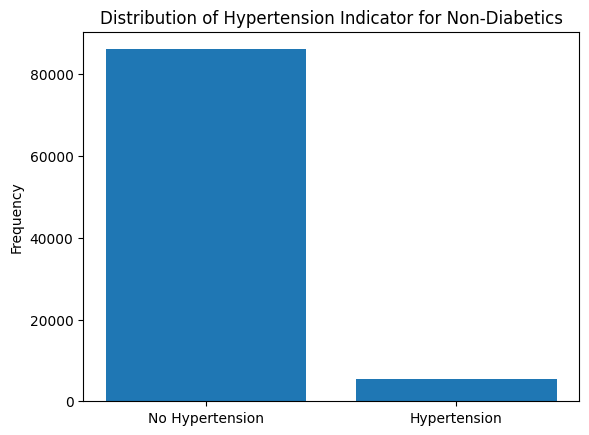

In [ ]:
hypertension_group_non_diabetics = non_diabetics_group.groupby(['hypertension'])['heart_disease'].count()
plt.bar([0, 1], list(hypertension_group_non_diabetics), tick_label=['No Hypertension', 'Hypertension'], align='center')
plt.title('Distribution of Hypertension Indicator for Non-Diabetics')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

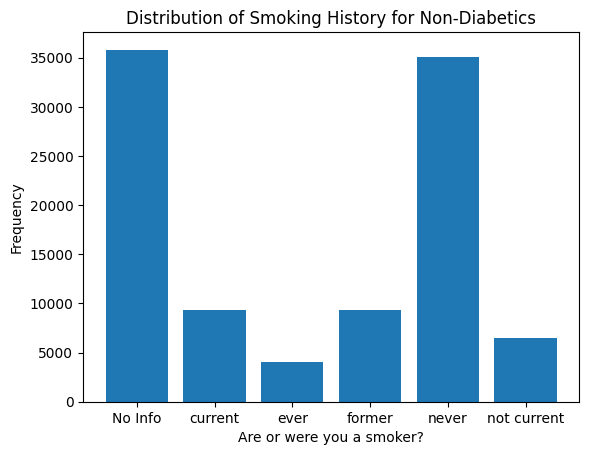

In [ ]:
smoking_group_non_diabetics = non_diabetics_group.groupby(['smoking_history'])['heart_disease'].count()
plt.bar(smoking_group_non_diabetics.index, list(smoking_group))
plt.title('Distribution of Smoking History for Non-Diabetics')
plt.xlabel('Are or were you a smoker?')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

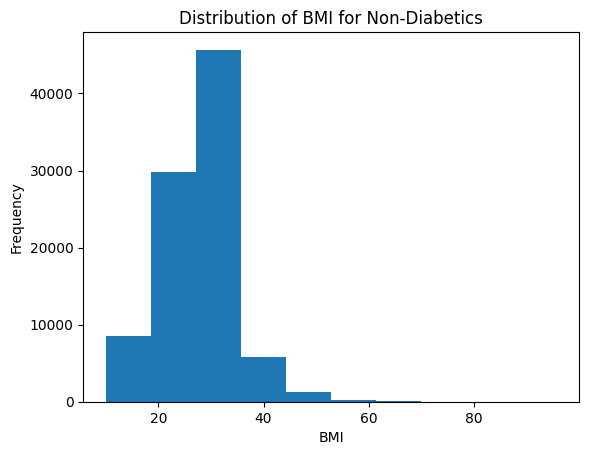

In [ ]:
plt.hist(non_diabetics_group['bmi'])
plt.title('Distribution of BMI for Non-Diabetics')
plt.xlabel('BMI')
plt.ylabel('Frequency')

Text(0.5, 0, 'BMI')

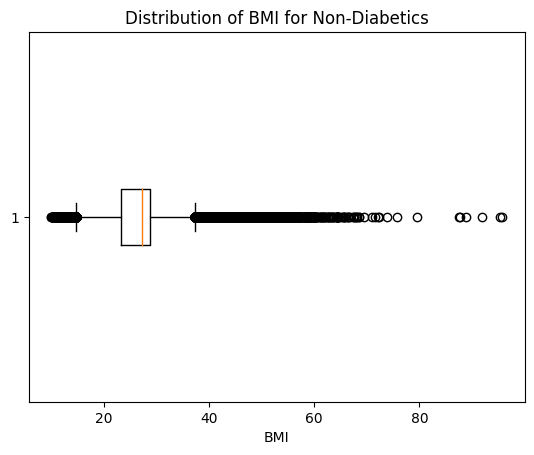

In [ ]:
plt.boxplot(non_diabetics_group['bmi'], vert=False)
plt.title('Distribution of BMI for Non-Diabetics')
plt.xlabel('BMI')

Text(0, 0.5, 'Frequency')

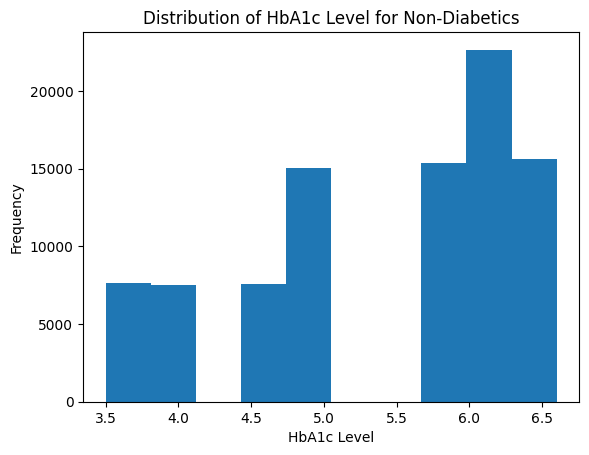

In [ ]:
plt.hist(non_diabetics_group['HbA1c_level'])
plt.title('Distribution of HbA1c Level for Non-Diabetics')
plt.xlabel('HbA1c Level')
plt.ylabel('Frequency')

Text(0.5, 0, 'HbA1c Level')

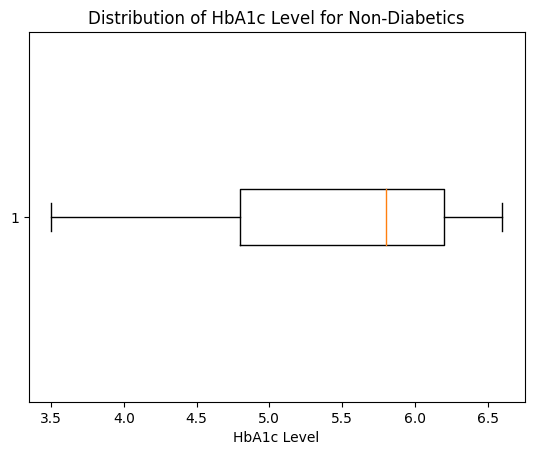

In [ ]:
plt.boxplot(non_diabetics_group['HbA1c_level'], vert=False)
plt.title('Distribution of HbA1c Level for Non-Diabetics')
plt.xlabel('HbA1c Level')

Text(0, 0.5, 'Frequency')

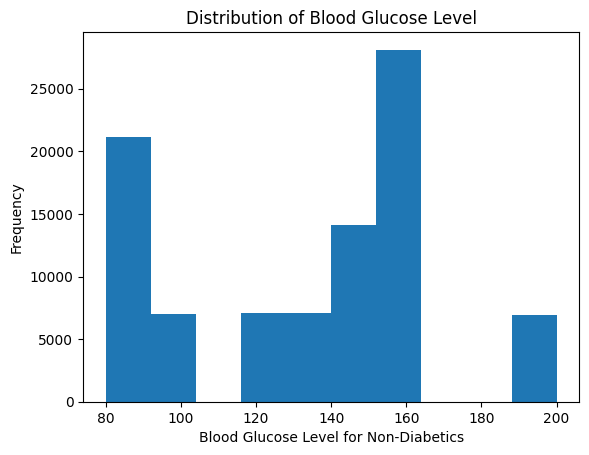

In [ ]:
plt.hist(non_diabetics_group['blood_glucose_level'])
plt.title('Distribution of Blood Glucose Level')
plt.xlabel('Blood Glucose Level for Non-Diabetics')
plt.ylabel('Frequency')

Text(0.5, 0, 'Blood Glucose Level')

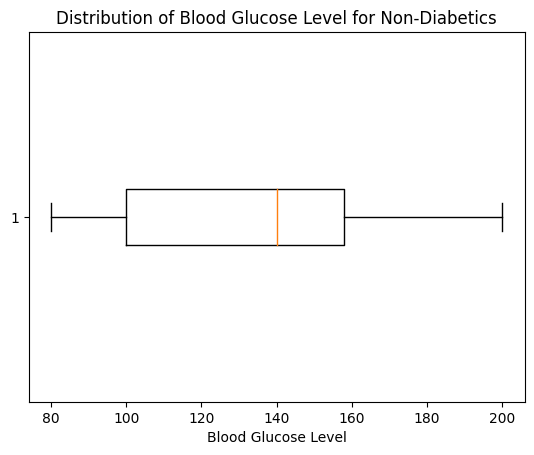

In [ ]:
plt.boxplot(non_diabetics_group['blood_glucose_level'], vert=False)
plt.title('Distribution of Blood Glucose Level for Non-Diabetics')
plt.xlabel('Blood Glucose Level')

In [ ]:
heart_disease = diabetes_df[diabetes_df['heart_disease'] == 1]
heart_disease

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
23,Female,72.0,0,1,former,27.94,6.5,130,0
26,Male,67.0,0,1,not current,27.32,6.5,200,1
42,Female,77.0,1,1,never,32.02,5.0,159,0
...,...,...,...,...,...,...,...,...,...
99826,Male,63.0,0,1,No Info,27.32,6.6,300,1
99848,Male,80.0,1,1,former,28.79,5.8,90,0
99912,Male,80.0,0,1,former,27.32,5.0,140,0
99935,Female,65.0,1,1,never,33.55,8.2,140,1


Text(0, 0.5, 'Frequency')

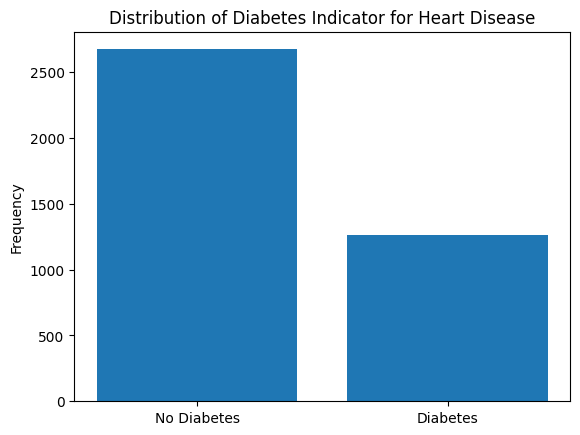

In [ ]:
diabetes_dist_heart_disease = heart_disease.groupby(['diabetes'])['heart_disease'].count()
plt.bar([0, 1], list(diabetes_dist_heart_disease), tick_label=['No Diabetes', 'Diabetes'], align='center')
plt.title('Distribution of Diabetes Indicator for Heart Disease')
plt.ylabel('Frequency')

## Data Wrangling and Cleaning Steps to Do:

1. One-Hot Encode gender feature
2. Group former, ever, and not current as the same value together since they mean the same, more or less
3. Label Encode smoking history
4. Convert age from float type to int type
5. Normalize continuous data (eg BMI, HbA!c_level, blood_glucose_level)

In [ ]:
gender_dummies = pd.get_dummies(diabetes_df['gender'])
gender_dummies

,Female,Male,Other
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
99995,1,0,0
99996,1,0,0
99997,0,1,0
99998,1,0,0


In [ ]:
diabetes_df['Female'] = gender_dummies['Female']
diabetes_df['Male'] = gender_dummies['Male']
diabetes_df['Other'] = gender_dummies['Other']
diabetes_df.drop(['gender'], axis=1, inplace=True)
diabetes_df

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,Other
0,80.0,0,1,never,25.19,6.6,140,0,1,0,0
1,54.0,0,0,No Info,27.32,6.6,80,0,1,0,0
2,28.0,0,0,never,27.32,5.7,158,0,0,1,0
3,36.0,0,0,current,23.45,5.0,155,0,1,0,0
4,76.0,1,1,current,20.14,4.8,155,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,No Info,27.32,6.2,90,0,1,0,0
99996,2.0,0,0,No Info,17.37,6.5,100,0,1,0,0
99997,66.0,0,0,former,27.83,5.7,155,0,0,1,0
99998,24.0,0,0,never,35.42,4.0,100,0,1,0,0


In [ ]:
diabetes_df['smoking_history'].replace(['ever', 'not current'], 'former', inplace=True)
diabetes_df

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,Other
0,80.0,0,1,never,25.19,6.6,140,0,1,0,0
1,54.0,0,0,No Info,27.32,6.6,80,0,1,0,0
2,28.0,0,0,never,27.32,5.7,158,0,0,1,0
3,36.0,0,0,current,23.45,5.0,155,0,1,0,0
4,76.0,1,1,current,20.14,4.8,155,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,No Info,27.32,6.2,90,0,1,0,0
99996,2.0,0,0,No Info,17.37,6.5,100,0,1,0,0
99997,66.0,0,0,former,27.83,5.7,155,0,0,1,0
99998,24.0,0,0,never,35.42,4.0,100,0,1,0,0


In [ ]:
encoder = LabelEncoder()
diabetes_df['smoking_history'] = encoder.fit_transform(np.array(diabetes_df['smoking_history']).reshape(-1,1))
diabetes_df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,Other
0,80.0,0,1,3,25.19,6.6,140,0,1,0,0
1,54.0,0,0,0,27.32,6.6,80,0,1,0,0
2,28.0,0,0,3,27.32,5.7,158,0,0,1,0
3,36.0,0,0,1,23.45,5.0,155,0,1,0,0
4,76.0,1,1,1,20.14,4.8,155,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,0,27.32,6.2,90,0,1,0,0
99996,2.0,0,0,0,17.37,6.5,100,0,1,0,0
99997,66.0,0,0,2,27.83,5.7,155,0,0,1,0
99998,24.0,0,0,3,35.42,4.0,100,0,1,0,0


In [ ]:
diabetes_df['age'] = diabetes_df['age'].astype('int64')
diabetes_df

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,Other
0,80,0,1,3,25.19,6.6,140,0,1,0,0
1,54,0,0,0,27.32,6.6,80,0,1,0,0
2,28,0,0,3,27.32,5.7,158,0,0,1,0
3,36,0,0,1,23.45,5.0,155,0,1,0,0
4,76,1,1,1,20.14,4.8,155,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,80,0,0,0,27.32,6.2,90,0,1,0,0
99996,2,0,0,0,17.37,6.5,100,0,1,0,0
99997,66,0,0,2,27.83,5.7,155,0,0,1,0
99998,24,0,0,3,35.42,4.0,100,0,1,0,0


In [ ]:
scaler = MinMaxScaler()
diabetes_df['age'] = scaler.fit_transform(np.array(diabetes_df['age']).reshape(-1,1))
diabetes_df['bmi'] = scaler.fit_transform(np.array(diabetes_df['bmi']).reshape(-1,1))
diabetes_df['HbA1c_level'] = scaler.fit_transform(np.array(diabetes_df['HbA1c_level']).reshape(-1,1))
diabetes_df['blood_glucose_level'] = scaler.fit_transform(np.array(diabetes_df['blood_glucose_level']).reshape(-1,1))
diabetes_df

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,Other
0,1.0000,0,1,3,0.177171,0.563636,0.272727,0,1,0,0
1,0.6750,0,0,0,0.202031,0.563636,0.000000,0,1,0,0
2,0.3500,0,0,3,0.202031,0.400000,0.354545,0,0,1,0
3,0.4500,0,0,1,0.156863,0.272727,0.340909,0,1,0,0
4,0.9500,1,1,1,0.118231,0.236364,0.340909,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,1.0000,0,0,0,0.202031,0.490909,0.045455,0,1,0,0
99996,0.0250,0,0,0,0.085901,0.545455,0.090909,0,1,0,0
99997,0.8250,0,0,2,0.207983,0.400000,0.340909,0,0,1,0
99998,0.3000,0,0,3,0.296569,0.090909,0.090909,0,1,0,0


In [ ]:
# Get input
diabetes_X = diabetes_df.drop(['diabetes'], axis=1)
diabetes_X

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Female,Male,Other
0,1.0000,0,1,3,0.177171,0.563636,0.272727,1,0,0
1,0.6750,0,0,0,0.202031,0.563636,0.000000,1,0,0
2,0.3500,0,0,3,0.202031,0.400000,0.354545,0,1,0
3,0.4500,0,0,1,0.156863,0.272727,0.340909,1,0,0
4,0.9500,1,1,1,0.118231,0.236364,0.340909,0,1,0
...,...,...,...,...,...,...,...,...,...,...
99995,1.0000,0,0,0,0.202031,0.490909,0.045455,1,0,0
99996,0.0250,0,0,0,0.085901,0.545455,0.090909,1,0,0
99997,0.8250,0,0,2,0.207983,0.400000,0.340909,0,1,0
99998,0.3000,0,0,3,0.296569,0.090909,0.090909,1,0,0


In [ ]:
# Get actual output
diabetes_y = diabetes_df['diabetes']
diabetes_y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [ ]:
# Implement ADASYN classification balancing technique
adasyn = ADASYN(random_state=42)
diabetes_X, diabetes_y = adasyn.fit_resample(diabetes_X, diabetes_y)

In [ ]:
# Input
diabetes_X

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Female,Male,Other
0,1.000000,0,1,3,0.177171,0.563636,0.272727,1,0,0
1,0.675000,0,0,0,0.202031,0.563636,0.000000,1,0,0
2,0.350000,0,0,3,0.202031,0.400000,0.354545,0,1,0
3,0.450000,0,0,1,0.156863,0.272727,0.340909,1,0,0
4,0.950000,1,1,1,0.118231,0.236364,0.340909,0,1,0
...,...,...,...,...,...,...,...,...,...,...
182946,0.719212,1,0,3,0.338783,0.636364,0.566501,1,0,0
182947,0.725000,1,0,3,0.322930,0.651875,0.545455,1,0,0
182948,0.725000,1,0,3,0.311534,0.675866,0.545455,1,0,0
182949,0.714490,1,0,3,0.345705,0.636364,0.583671,1,0,0


In [ ]:
# Output
diabetes_y

0         0
1         0
2         0
3         0
4         0
         ..
182946    1
182947    1
182948    1
182949    1
182950    1
Name: diabetes, Length: 182951, dtype: int64

## Data Modeling

We want to predict diabetes and investigate the features that determines diabetes and their influences on the outcome. This is a classification problem.

Questions:

1. (Main question) What are the features that influence diabetes and how much influence do these features have?

2. (Main question) How do factors such as heart disease or gender/biological sex play a role in the development and risk of diabetes?

3. (Main question) Given values of all features, what is the probabilistic chance a person will get diabetes?

4. (Next step) What are the features that influence heart disease and how much influence do these features have?

5. (Next step) How does diabetes influence the risk of heart disease?

Novel Contributions:

1. Calculating probability risk of developing diabetes given the values of features

2. Determining how other diseases and health conditions such as heart disease plays a role in diabetes

3. Determining if one gender/biological sex has an increased chance of developing diabetes

4. Using training time as a determination of the best or most efficient model aside from testing phase performance (focusing on efficiency)

In [ ]:
# Global Variable Dictionary that stores all the results
results_dict = {
    "Model_Name": [],
    "Model_Type": [],
    "Training_Time": [],
    "Accuracy_Score": [],
    "ROC_AUC_Score": [],
    "Precision_Score": [],
    "Recall_Score": [],
    "F_Beta_Score_Beta_2": []
}

In [ ]:
"""
Description: Function formats a numeric value for printing or storing as a string

Input: number: Numeric value that is the number to be formatted

Output: str(number): String that is the formatted version of number
"""
def format_number(number):
  if number < 10:
    return "0" + str(number)
  return str(number)

In [ ]:
"""
Description: Function prints out all the results of the trained model

Input: model: sklearn model that has already been trained, validated, and tested
training_time_hours: int that is the hour part of the training time
training_time_minutes: int that is the minute part of the training time
training_time_seconds: float that is the seconds part of the training time
valid_acc_score: float that is the validation accuracy score
valid_roc_auc_score: float that is the validation ROC-AUC score
valid_precision_score: float that is the validation precision score
valid_recall_score: float that is the validation recall score
valid_fbeta_score: float that is the validation F-Beta score
test_acc_score: float that is the testing accuracy score
test_roc_auc_score: float that is the testing ROC-AUC score
test_precision_score: float that is the testing precision score
test_recall_score: float that is the testing recall score
test_fbeta_score: float that is the testing F-Beta score
X_test: Dataframe that is the testing input
y_test: Series that is the testing output

Output: None
"""
def print_results(model, training_time_hours, training_time_minutes, training_time_seconds, valid_acc_score, valid_roc_auc_score, valid_precision_score, valid_recall_score, valid_fbeta_score, test_acc_score, test_roc_auc_score, test_precision_score, test_recall_score, test_fbeta_score, X_test, y_test):
  # Print training time results
  print(f"Training time: "+str(training_time_hours)+" hours "+str(training_time_minutes)+" minutes "+str(training_time_seconds)+" seconds")
  print("")
  # Print validation results
  print(f"Validation Accuracy Score: " + str(valid_acc_score))
  print(f"Validation ROC-AUC Score: " + str(valid_roc_auc_score))
  print(f"Validation Precision Score: " + str(valid_precision_score))
  print(f"Validation Recall Score: " + str(valid_recall_score))
  print(f"Validation f-Beta Score: " + str(valid_fbeta_score))
  print("")
  # Print testing results
  print(f"Testing Accuracy Score: " + str(test_acc_score))
  print(f"Testing ROC-AUC Score: " + str(test_roc_auc_score))
  print(f"Testing Precision Score: " + str(test_precision_score))
  print(f"Testing Recall Score: " + str(test_recall_score))
  print(f"Testing f-Beta Score: " + str(test_fbeta_score))
  # Print testing input
  print(X_test)
  # Print risk probabilities
  print(model.predict_proba(X_test))
  # Print confusion matrix of tested trained model
  print(confusion_matrix(y_test, model.predict(X_test)))
  return

In [ ]:
"""
Description: Function stores final testing results of the trained model

Input: model_name: String that is the name of the trained model which its testing information is going to be stored
model_type: String that indicates whether the model is a baseline model or optimized model
training_time: String that indicates the training time of the model
test_acc_score: float that is the testing accuracy score
test_roc_auc_score: float that is the testing ROC-AUC score
test_precision_score: float that is the testing precision score
test_recall_score: float that is the testing recall score
test_fbeta_score: float that is the testing F-Beta score

Output: results_dict: Dictionary that stores all the model testing results
"""
def append_results(model_name, model_type, training_time, test_acc_score, test_roc_auc_score, test_precision_score, test_recall_score, test_fbeta_score):
  # Retrieve all current entries/results
  model_name_list = results_dict['Model_Name']
  model_type_list = results_dict['Model_Type']
  training_time_list = results_dict['Training_Time']
  accuracy_list = results_dict['Accuracy_Score']
  roc_auc_list = results_dict['ROC_AUC_Score']
  precision_list = results_dict['Precision_Score']
  recall_list = results_dict['Recall_Score']
  f_beta_list = results_dict['F_Beta_Score_Beta_2']
  # Add in new results into dictionary entries
  model_name_list.append(model_name)
  model_type_list.append(model_type)
  training_time_list.append(training_time)
  accuracy_list.append(round(test_acc_score, 5))
  roc_auc_list.append(round(test_roc_auc_score, 5))
  precision_list.append(round(test_precision_score, 5))
  recall_list.append(round(test_recall_score, 5))
  f_beta_list.append(round(test_fbeta_score, 5))
  # Update results dictionary with new results
  results_dict['Model_Name'] = model_name_list
  results_dict['Model_Type'] = model_type_list
  results_dict['Training_Time'] = training_time_list
  results_dict['Accuracy_Score'] = accuracy_list
  results_dict['ROC_AUC_Score'] = roc_auc_list
  results_dict['Precision_Score'] = precision_list
  results_dict['Recall_Score'] = recall_list
  results_dict['F_Beta_Score_Beta_2'] = f_beta_list
  # Return updated results dictionary
  return results_dict

### Diabetes Splitting Dataset

In [ ]:
X_train, X_val_test, y_train, y_val_test = train_test_split(diabetes_X, diabetes_y, test_size=0.20, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_val_test, y_val_test, test_size=0.50, random_state=42)

### Baseline Models (Diabetes)

Baseline Models with no hyperparameter tuning

1. Naive Bayes
2. Logistic Regression
3. Random Forests
4. XGBoost
5. CATBoost
6. LightGBM
7. Gradient Boosted Trees

In [ ]:
"""
Description: Function trains, validates, and tests baseline model using dataset

Input: model_name: String that is the name of the trained model which its testing information is going to be stored
model: sklearn model that will be trained, validated, and tested
X_train: Dataframe that is the training input
y_train: Series that is the training output
X_valid: Dataframe that is the validation input
y_valid: Series that is the validation output
X_test: Dataframe that is the testing input
y_test: Series that is the testing output

Output: baseline_model: The trained (validated, and tested) baseline model
"""
def baseline_model_func(model_name, model, X_train, y_train, X_valid, y_valid, X_test, y_test):
  # Training Phase
  start = time.time()
  baseline_model = model.fit(X_train, y_train)
  end = time.time()
  # Calculate training time and convert to proper time
  training_time = end - start
  training_time_seconds = training_time % 60.0
  training_time_seconds = round(training_time_seconds, 5)
  training_time_minutes = training_time // 60
  training_time_hours = int(training_time_minutes // 60)
  training_time_minutes = int(training_time_minutes % 60)
  # Validation Phase
  valid_acc_score = baseline_model.score(X_valid, y_valid)
  valid_acc_score = round(valid_acc_score, 5)
  valid_roc_auc_score = roc_auc_score(y_valid, baseline_model.predict_proba(X_valid)[:, 1])
  valid_roc_auc_score = round(valid_roc_auc_score, 5)
  valid_precision_score = precision_score(y_valid, baseline_model.predict(X_valid))
  valid_precision_score = round(valid_precision_score, 5)
  valid_recall_score = recall_score(y_valid, baseline_model.predict(X_valid))
  valid_recall_score = round(valid_recall_score, 5)
  valid_fbeta_score = fbeta_score(y_valid, baseline_model.predict(X_valid), beta=2)
  valid_fbeta_score = round(valid_fbeta_score, 5)
  # Testing Phase
  test_acc_score = model.score(X_test, y_test)
  test_acc_score = round(test_acc_score, 5)
  test_roc_auc_score = roc_auc_score(y_test, baseline_model.predict_proba(X_test)[:, 1])
  test_roc_auc_score = round(test_roc_auc_score, 5)
  test_precision_score = precision_score(y_test, baseline_model.predict(X_test))
  test_precision_score = round(test_precision_score, 5)
  test_recall_score = recall_score(y_test, baseline_model.predict(X_test))
  test_recall_score = round(test_recall_score, 5)
  test_fbeta_score = fbeta_score(y_test, baseline_model.predict(X_test), beta=2)
  # test_fbeta_score = round(test_fbeta_score, 5)
  # Showcase results
  print_results(baseline_model, training_time_hours, training_time_minutes, training_time_seconds, valid_acc_score, valid_roc_auc_score, valid_precision_score, valid_recall_score, valid_fbeta_score, test_acc_score, test_roc_auc_score, test_precision_score, test_recall_score, test_fbeta_score, X_test, y_test)
  # Format Time to be stored into results
  training_time_hours_str = format_number(training_time_hours)
  training_time_minutes_str = format_number(training_time_minutes)
  training_time_seconds_str = format_number(training_time_seconds)
  training_time_str = training_time_hours_str + ":" + training_time_minutes_str + ":" + training_time_seconds_str
  # Store results
  append_results(model_name, "Baseline", training_time_str, test_acc_score, test_roc_auc_score, test_precision_score, test_recall_score, test_fbeta_score)
  # Return model
  return baseline_model

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Baseline Naive Bayes
baseline_nb = baseline_model_func("Gaussian Naive Bayes", GaussianNB(), X_train, y_train, X_valid, y_valid, X_test, y_test)

Training time: 0 hours 0 minutes 0.04465 seconds

Validation Accuracy Score: 0.67538
Validation ROC-AUC Score: 0.88323
Validation Precision Score: 0.60858
Validation Recall Score: 0.99707
Validation f-Beta Score: 0.88419

Testing Accuracy Score: 0.6731
Testing ROC-AUC Score: 0.87884
Testing Precision Score: 0.60383
Testing Recall Score: 0.99725
Testing f-Beta Score: 0.882284336974692
             age  hypertension  heart_disease  smoking_history       bmi  \
165469  0.397208             0              0                3  0.407287   
102694  0.951976             0              0                3  0.203422   
149487  0.642008             1              0                3  0.222640   
171833  0.883168             1              0                3  0.202659   
112494  0.712771             0              0                3  0.358959   
...          ...           ...            ...              ...       ...   
141875  0.779673             0              0                3  0.323910   
49685

In [ ]:
from sklearn.linear_model import LogisticRegression
# Baseline Logistic Regression
baseline_lr = baseline_model_func("Logistic Regression", LogisticRegression(), X_train, y_train, X_valid, y_valid, X_test, y_test)

Training time: 0 hours 0 minutes 1.46106 seconds

Validation Accuracy Score: 0.83761
Validation ROC-AUC Score: 0.91386
Validation Precision Score: 0.81865
Validation Recall Score: 0.87059
Validation f-Beta Score: 0.85968

Testing Accuracy Score: 0.83488
Testing ROC-AUC Score: 0.91094
Testing Precision Score: 0.81196
Testing Recall Score: 0.86949
Testing f-Beta Score: 0.8573440207972269
             age  hypertension  heart_disease  smoking_history       bmi  \
165469  0.397208             0              0                3  0.407287   
102694  0.951976             0              0                3  0.203422   
149487  0.642008             1              0                3  0.222640   
171833  0.883168             1              0                3  0.202659   
112494  0.712771             0              0                3  0.358959   
...          ...           ...            ...              ...       ...   
141875  0.779673             0              0                3  0.323910   
496

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Baseline Random Forest
baseline_rf = baseline_model_func("Random Forest", RandomForestClassifier(), X_train, y_train, X_valid, y_valid, X_test, y_test)

Training time: 0 hours 0 minutes 22.92166 seconds

Validation Accuracy Score: 0.976
Validation ROC-AUC Score: 0.99749
Validation Precision Score: 0.96623
Validation Recall Score: 0.98687
Validation f-Beta Score: 0.98268

Testing Accuracy Score: 0.97628
Testing ROC-AUC Score: 0.99784
Testing Precision Score: 0.96653
Testing Recall Score: 0.98649
Testing f-Beta Score: 0.982430037415487
             age  hypertension  heart_disease  smoking_history       bmi  \
165469  0.397208             0              0                3  0.407287   
102694  0.951976             0              0                3  0.203422   
149487  0.642008             1              0                3  0.222640   
171833  0.883168             1              0                3  0.202659   
112494  0.712771             0              0                3  0.358959   
...          ...           ...            ...              ...       ...   
141875  0.779673             0              0                3  0.323910   
49685

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# Baseline Decision Tree-based Bagging
baseline_bag = baseline_model_func("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42)), X_train, y_train, X_valid, y_valid, X_test, y_test)

Training time: 0 hours 0 minutes 4.94931 seconds

Validation Accuracy Score: 0.97469
Validation ROC-AUC Score: 0.99504
Validation Precision Score: 0.9767
Validation Recall Score: 0.97299
Validation f-Beta Score: 0.97373

Testing Accuracy Score: 0.97551
Testing ROC-AUC Score: 0.99559
Testing Precision Score: 0.97654
Testing Recall Score: 0.97418
Testing f-Beta Score: 0.9746554414964939
             age  hypertension  heart_disease  smoking_history       bmi  \
165469  0.397208             0              0                3  0.407287   
102694  0.951976             0              0                3  0.203422   
149487  0.642008             1              0                3  0.222640   
171833  0.883168             1              0                3  0.202659   
112494  0.712771             0              0                3  0.358959   
...          ...           ...            ...              ...       ...   
141875  0.779673             0              0                3  0.323910   
4968

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# Baseline AdaBoost
baseline_ada = baseline_model_func("AdaBoost", AdaBoostClassifier(), X_train, y_train, X_valid, y_valid, X_test, y_test)

Training time: 0 hours 0 minutes 5.33545 seconds

Validation Accuracy Score: 0.91435
Validation ROC-AUC Score: 0.97947
Validation Precision Score: 0.88709
Validation Recall Score: 0.95108
Validation f-Beta Score: 0.93755

Testing Accuracy Score: 0.91676
Testing ROC-AUC Score: 0.97972
Testing Precision Score: 0.88888
Testing Recall Score: 0.95166
Testing f-Beta Score: 0.9384072100177652
             age  hypertension  heart_disease  smoking_history       bmi  \
165469  0.397208             0              0                3  0.407287   
102694  0.951976             0              0                3  0.203422   
149487  0.642008             1              0                3  0.222640   
171833  0.883168             1              0                3  0.202659   
112494  0.712771             0              0                3  0.358959   
...          ...           ...            ...              ...       ...   
141875  0.779673             0              0                3  0.323910   
496

In [ ]:
import xgboost as xgb
# Baseline XGBoost
baseline_xgb = baseline_model_func("XGBoost", xgb.XGBClassifier(), X_train, y_train, X_valid, y_valid, X_test, y_test)

Training time: 0 hours 0 minutes 1.02231 seconds

Validation Accuracy Score: 0.96868
Validation ROC-AUC Score: 0.99637
Validation Precision Score: 0.98205
Validation Recall Score: 0.95531
Validation f-Beta Score: 0.96054

Testing Accuracy Score: 0.96906
Testing ROC-AUC Score: 0.99657
Testing Precision Score: 0.98085
Testing Recall Score: 0.9565
Testing f-Beta Score: 0.9612709487955131
             age  hypertension  heart_disease  smoking_history       bmi  \
165469  0.397208             0              0                3  0.407287   
102694  0.951976             0              0                3  0.203422   
149487  0.642008             1              0                3  0.222640   
171833  0.883168             1              0                3  0.202659   
112494  0.712771             0              0                3  0.358959   
...          ...           ...            ...              ...       ...   
141875  0.779673             0              0                3  0.323910   
4968

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
# Baseline CatBoost
baseline_cb = baseline_model_func("CatBoost", CatBoostClassifier(), X_train, y_train, X_valid, y_valid, X_test, y_test)

Learning rate set to 0.08661
0:	learn: 0.5435969	total: 77.3ms	remaining: 1m 17s
1:	learn: 0.4555207	total: 105ms	remaining: 52.6s
2:	learn: 0.4109432	total: 133ms	remaining: 44.2s
3:	learn: 0.3745696	total: 160ms	remaining: 39.9s
4:	learn: 0.3456336	total: 193ms	remaining: 38.4s
5:	learn: 0.3277315	total: 222ms	remaining: 36.8s
6:	learn: 0.3176945	total: 251ms	remaining: 35.6s
7:	learn: 0.3055234	total: 306ms	remaining: 38s
8:	learn: 0.2871669	total: 339ms	remaining: 37.3s
9:	learn: 0.2765607	total: 369ms	remaining: 36.6s
10:	learn: 0.2720666	total: 401ms	remaining: 36s
11:	learn: 0.2638620	total: 458ms	remaining: 37.7s
12:	learn: 0.2537393	total: 532ms	remaining: 40.4s
13:	learn: 0.2460741	total: 626ms	remaining: 44.1s
14:	learn: 0.2397786	total: 702ms	remaining: 46.1s
15:	learn: 0.2364390	total: 765ms	remaining: 47.1s
16:	learn: 0.2267661	total: 810ms	remaining: 46.8s
17:	learn: 0.2239189	total: 854ms	remaining: 46.6s
18:	learn: 0.2173411	total: 893ms	remaining: 46.1s
19:	learn: 0.2

In [ ]:
import lightgbm as lgb
# Baseline LightGBM
baseline_lgb = baseline_model_func("LightGBM", lgb.LGBMClassifier(), X_train, y_train, X_valid, y_valid, X_test, y_test)

[LightGBM] [Info] Number of positive: 73129, number of negative: 73231
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1024
[LightGBM] [Info] Number of data points in the train set: 146360, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499652 -> initscore=-0.001394
[LightGBM] [Info] Start training from score -0.001394
Training time: 0 hours 0 minutes 1.97112 seconds

Validation Accuracy Score: 0.97338
Validation ROC-AUC Score: 0.99703
Validation Precision Score: 0.98815
Validation Recall Score: 0.95867
Validation f-Beta Score: 0.96443

Testing Accuracy Score: 0.97409
Testing ROC-AUC Score: 0.99703
Testing Precision Score: 0.98757
Testing Recall Score: 0.96001
Testing f-Beta Score: 0.9654006760787432
             age  hypertension  heart_disease  smoking_history       bmi  \
165469  0.397208             0        

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Baseline Gradient Boosting
baseline_gb = baseline_model_func("Gradient Boosting", GradientBoostingClassifier(), X_train, y_train, X_valid, y_valid, X_test, y_test)

Training time: 0 hours 0 minutes 48.60707 seconds

Validation Accuracy Score: 0.94075
Validation ROC-AUC Score: 0.99078
Validation Precision Score: 0.92463
Validation Recall Score: 0.96073
Validation f-Beta Score: 0.95329

Testing Accuracy Score: 0.94015
Testing ROC-AUC Score: 0.99065
Testing Precision Score: 0.92361
Testing Recall Score: 0.95902
Testing f-Beta Score: 0.9517268445839876
             age  hypertension  heart_disease  smoking_history       bmi  \
165469  0.397208             0              0                3  0.407287   
102694  0.951976             0              0                3  0.203422   
149487  0.642008             1              0                3  0.222640   
171833  0.883168             1              0                3  0.202659   
112494  0.712771             0              0                3  0.358959   
...          ...           ...            ...              ...       ...   
141875  0.779673             0              0                3  0.323910   
49

In [ ]:
results_dict

{'Model_Name': ['Gaussian Naive Bayes',
  'Logistic Regression',
  'Random Forest',
  'Bagging',
  'AdaBoost',
  'XGBoost',
  'CatBoost',
  'LightGBM',
  'Gradient Boosting'],
 'Model_Type': ['Baseline',
  'Baseline',
  'Baseline',
  'Baseline',
  'Baseline',
  'Baseline',
  'Baseline',
  'Baseline',
  'Baseline'],
 'Training_Time': ['00:00:00.04465',
  '00:00:01.46106',
  '00:00:22.92166',
  '00:00:04.94931',
  '00:00:05.33545',
  '00:00:01.02231',
  '00:00:56.31308',
  '00:00:01.97112',
  '00:00:48.60707'],
 'Accuracy_Score': [0.6731,
  0.83488,
  0.97628,
  0.97551,
  0.91676,
  0.96906,
  0.98202,
  0.97409,
  0.94015],
 'ROC_AUC_Score': [0.87884,
  0.91094,
  0.99784,
  0.99559,
  0.97972,
  0.99657,
  0.998,
  0.99703,
  0.99065],
 'Precision_Score': [0.60383,
  0.81196,
  0.96653,
  0.97654,
  0.88888,
  0.98085,
  0.99392,
  0.98757,
  0.92361],
 'Recall_Score': [0.99725,
  0.86949,
  0.98649,
  0.97418,
  0.95166,
  0.9565,
  0.96979,
  0.96001,
  0.95902],
 'F_Beta_Score_Beta

### Optimized Tuned Models (Diabetes)

Baseline Models with hyperparameter tuning

1. Naive Bayes
2. Logistic Regression


*   Default Solver
*   Newton-cg Solver


3. Random Forests
4. XGBoost
5. CATBoost
6. LightGBM
7. Gradient Boosted Trees

In [ ]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.5 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score
"""
Description: Function trains, validates, and tests optimized model using dataset

Input: model_name: String that is the name of the trained model which its testing information is going to be stored
model: sklearn model that will be trained, validated, and tested
params: Dictionary that indicates all the parameters and their values to be tested across
scoring: String that indicates metric of scoring to determine optimized model
n_iter: Int that indicates number of iterations of optimization
cv: Int that indicates number of rounds of optimization per iteration
random_state: Int that indicates a random number
verbose: Int that indicates printed results
X_train: Dataframe that is the training input
y_train: Series that is the training output
X_valid: Dataframe that is the validation input
y_valid: Series that is the validation output
X_test: Dataframe that is the testing input
y_test: Series that is the testing output

Output: model_bayes: The trained (validated, and tested) optimized model
"""
def bayes_search_optimization_func(model_name, model, params, scoring, n_iter, cv, random_state, verbose, X_train, y_train, X_valid, y_valid, X_test, y_test):
  # Create optimizer
  optimizer = BayesSearchCV(
      model, params,
      n_iter=n_iter,
      scoring=scoring,
      cv=cv,
      random_state=random_state,
      verbose=verbose
  )
  # Training phase
  start = time.time()
  model_bayes = optimizer.fit(X_train, y_train)
  end = time.time()
  # Calculate training time and convert to proper time
  training_time = end - start
  training_time_seconds = training_time % 60.0
  training_time_seconds = round(training_time_seconds, 5)
  training_time_minutes = training_time // 60
  training_time_hours = int(training_time_minutes // 60)
  training_time_minutes = int(training_time_minutes % 60)
  # Validation phase
  valid_acc_score = accuracy_score(y_valid, model_bayes.predict(X_valid))
  valid_acc_score = round(valid_acc_score, 5)
  valid_roc_auc_score = roc_auc_score(y_valid, model_bayes.predict_proba(X_valid)[:, 1])
  valid_roc_auc_score = round(valid_roc_auc_score, 5)
  valid_precision_score = precision_score(y_valid, model_bayes.predict(X_valid))
  valid_precision_score = round(valid_precision_score, 5)
  valid_recall_score = recall_score(y_valid, model_bayes.predict(X_valid))
  valid_recall_score = round(valid_recall_score, 5)
  valid_fbeta_score = fbeta_score(y_valid, model_bayes.predict(X_valid), beta=2)
  valid_fbeta_score = round(valid_fbeta_score, 5)
  # Testing phase
  test_acc_score = accuracy_score(y_test, model_bayes.predict(X_test))
  test_acc_score = round(test_acc_score, 5)
  test_roc_auc_score = roc_auc_score(y_test, model_bayes.predict_proba(X_test)[:, 1])
  test_roc_auc_score = round(test_roc_auc_score, 5)
  test_precision_score = precision_score(y_test, model_bayes.predict(X_test))
  test_precision_score = round(test_precision_score, 5)
  test_recall_score = recall_score(y_test, model_bayes.predict(X_test))
  test_recall_score = round(test_recall_score, 5)
  test_fbeta_score = fbeta_score(y_test, model_bayes.predict(X_test), beta=2)
  test_fbeta_score = round(test_fbeta_score, 5)
  # Showcase results
  print_results(model_bayes, training_time_hours, training_time_minutes, training_time_seconds, valid_acc_score, valid_roc_auc_score, valid_precision_score, valid_recall_score, valid_fbeta_score, test_acc_score, test_roc_auc_score, test_precision_score, test_recall_score, test_fbeta_score, X_test, y_test)
  # Format Time to be stored into results
  training_time_hours_str = format_number(training_time_hours)
  training_time_minutes_str = format_number(training_time_minutes)
  training_time_seconds_str = format_number(training_time_seconds)
  training_time_str = training_time_hours_str + ":" + training_time_minutes_str + ":" + training_time_seconds_str
  # Store results
  append_results(model_name, "Bayes Optimization", training_time_str, test_acc_score, test_roc_auc_score, test_precision_score, test_recall_score, test_fbeta_score)
  # Return model
  return model_bayes

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
"""
Description: Function trains, validates, and tests optimized logistic regression model using dataset

Input:
cv: Int that indicates number of rounds of optimization per iteration
solver: String that indicates the type of solver to optimize logistic regression model
X_train: Dataframe that is the training input
y_train: Series that is the training output
X_valid: Dataframe that is the validation input
y_valid: Series that is the validation output
X_test: Dataframe that is the testing input
y_test: Series that is the testing output

Output: model_bayes: The trained (validated, and tested) optimized logistic regression model
"""
def optim_log_regression(cv, solver, X_train, y_train, X_valid, y_valid, X_test, y_test):
  # Training phase
  start = time.time()
  optimized_lg = LogisticRegressionCV(cv = cv, solver=solver).fit(X_train, y_train)
  end = time.time()
  # Calculate training time and convert to proper time
  training_time = end - start
  training_time_seconds = training_time % 60.0
  training_time_seconds = round(training_time_seconds, 5)
  training_time_minutes = training_time // 60
  training_time_hours = int(training_time_minutes // 60)
  training_time_minutes = int(training_time_minutes % 60)
  # Validation phase
  valid_acc_score = optimized_lg.score(X_valid, y_valid)
  valid_acc_score = round(valid_acc_score, 5)
  valid_roc_auc_score = roc_auc_score(y_valid, optimized_lg.predict_proba(X_valid)[:, 1])
  valid_roc_auc_score = round(valid_roc_auc_score, 5)
  valid_precision_score = precision_score(y_valid, optimized_lg.predict(X_valid))
  valid_precision_score = round(valid_precision_score, 5)
  valid_recall_score = recall_score(y_valid, optimized_lg.predict(X_valid))
  valid_recall_score = round(valid_recall_score, 5)
  valid_fbeta_score = fbeta_score(y_valid, optimized_lg.predict(X_valid), beta=2)
  valid_fbeta_score = round(valid_fbeta_score, 5)
  # Testing phase
  test_acc_score = optimized_lg.score(X_test, y_test)
  test_acc_score = round(test_acc_score, 5)
  test_roc_auc_score = roc_auc_score(y_test, optimized_lg.predict_proba(X_test)[:, 1])
  test_roc_auc_score = round(test_roc_auc_score, 5)
  test_precision_score = precision_score(y_test, optimized_lg.predict(X_test))
  test_precision_score = round(test_precision_score, 5)
  test_recall_score = recall_score(y_test, optimized_lg.predict(X_test))
  test_recall_score = round(test_recall_score, 5)
  test_fbeta_score = fbeta_score(y_test, optimized_lg.predict(X_test), beta=2)
  test_fbeta_score = round(test_fbeta_score, 5)
  # Showcase results
  print_results(optimized_lg, training_time_hours, training_time_minutes, training_time_seconds, valid_acc_score, valid_roc_auc_score, valid_precision_score, valid_recall_score, valid_fbeta_score, test_acc_score, test_roc_auc_score, test_precision_score, test_recall_score, test_fbeta_score, X_test, y_test)
  # Format Time to be stored into results
  training_time_hours_str = format_number(training_time_hours)
  training_time_minutes_str = format_number(training_time_minutes)
  training_time_seconds_str = format_number(training_time_seconds)
  training_time_str = training_time_hours_str + ":" + training_time_minutes_str + ":" + training_time_seconds_str
  # Format optimization type
  optimized_lg_type = solver + "Optimization"
  # Store results
  append_results("Logistic Regression", optimized_lg_type, training_time_str, test_acc_score, test_roc_auc_score, test_precision_score, test_recall_score, test_fbeta_score)
  # Return model
  return optimized_lg

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.metrics import accuracy_score
# Bayesian Optimized Naive Bayes
nb_bayes = bayes_search_optimization_func("Gaussian Naive Bayes", GaussianNB(),
    {
        'var_smoothing': Real(0, 0.1)
    },
    'roc_auc', 15, 5, 42, 500, X_train, y_train, X_valid, y_valid, X_test, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START var_smoothing=0.04101039588533139...........................
[CV 1/5; 1/1] END var_smoothing=0.04101039588533139;, score=0.855 total time=   0.1s
[CV 2/5; 1/1] START var_smoothing=0.04101039588533139...........................
[CV 2/5; 1/1] END var_smoothing=0.04101039588533139;, score=0.853 total time=   0.1s
[CV 3/5; 1/1] START var_smoothing=0.04101039588533139...........................
[CV 3/5; 1/1] END var_smoothing=0.04101039588533139;, score=0.850 total time=   0.1s
[CV 4/5; 1/1] START var_smoothing=0.04101039588533139...........................
[CV 4/5; 1/1] END var_smoothing=0.04101039588533139;, score=0.850 total time=   0.1s
[CV 5/5; 1/1] START var_smoothing=0.04101039588533139...........................
[CV 5/5; 1/1] END var_smoothing=0.04101039588533139;, score=0.856 total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START var_smoothing=0.0837388355553284

In [ ]:
#from sklearn.linear_model import LogisticRegressionCV
# Newton-Cg Optimized Logistic Regression
optimized_lg_one = optim_log_regression(5, 'newton-cg', X_train, y_train, X_valid, y_valid, X_test, y_test)

Training time: 0 hours 0 minutes 51.63028 seconds

Validation Accuracy Score: 0.83777
Validation ROC-AUC Score: 0.91375
Validation Precision Score: 0.81651
Validation Recall Score: 0.87461
Validation f-Beta Score: 0.86233

Testing Accuracy Score: 0.8345
Testing ROC-AUC Score: 0.91087
Testing Precision Score: 0.81061
Testing Recall Score: 0.87081
Testing f-Beta Score: 0.85807
             age  hypertension  heart_disease  smoking_history       bmi  \
165469  0.397208             0              0                3  0.407287   
102694  0.951976             0              0                3  0.203422   
149487  0.642008             1              0                3  0.222640   
171833  0.883168             1              0                3  0.202659   
112494  0.712771             0              0                3  0.358959   
...          ...           ...            ...              ...       ...   
141875  0.779673             0              0                3  0.323910   
49685   0.9875

In [ ]:
# Optimized Newton-Cholesky Logistic Regression
optimized_lg_two = optim_log_regression(5, 'newton-cholesky', X_train, y_train, X_valid, y_valid, X_test, y_test)

Training time: 0 hours 0 minutes 3.28668 seconds

Validation Accuracy Score: 0.83782
Validation ROC-AUC Score: 0.91375
Validation Precision Score: 0.81652
Validation Recall Score: 0.87472
Validation f-Beta Score: 0.86242

Testing Accuracy Score: 0.8345
Testing ROC-AUC Score: 0.91087
Testing Precision Score: 0.81061
Testing Recall Score: 0.87081
Testing f-Beta Score: 0.85807
             age  hypertension  heart_disease  smoking_history       bmi  \
165469  0.397208             0              0                3  0.407287   
102694  0.951976             0              0                3  0.203422   
149487  0.642008             1              0                3  0.222640   
171833  0.883168             1              0                3  0.202659   
112494  0.712771             0              0                3  0.358959   
...          ...           ...            ...              ...       ...   
141875  0.779673             0              0                3  0.323910   
49685   0.98750

In [ ]:
# Optimized LBFGS Logistic Regression
optimized_lg_three = optim_log_regression(5, 'lbfgs', X_train, y_train, X_valid, y_valid, X_test, y_test)

Training time: 0 hours 0 minutes 25.15087 seconds

Validation Accuracy Score: 0.83777
Validation ROC-AUC Score: 0.91375
Validation Precision Score: 0.81651
Validation Recall Score: 0.87461
Validation f-Beta Score: 0.86233

Testing Accuracy Score: 0.83439
Testing ROC-AUC Score: 0.91087
Testing Precision Score: 0.81051
Testing Recall Score: 0.8707
Testing f-Beta Score: 0.85796
             age  hypertension  heart_disease  smoking_history       bmi  \
165469  0.397208             0              0                3  0.407287   
102694  0.951976             0              0                3  0.203422   
149487  0.642008             1              0                3  0.222640   
171833  0.883168             1              0                3  0.202659   
112494  0.712771             0              0                3  0.358959   
...          ...           ...            ...              ...       ...   
141875  0.779673             0              0                3  0.323910   
49685   0.9875

In [ ]:
# Bayesian Optimized Random Forest
rf_bayes = bayes_search_optimization_func("Random Forest", RandomForestClassifier(),
    {
        'n_estimators': Integer(200, 500),
        'max_features': Categorical(['sqrt', 'log2', None]),
        'max_depth': Integer(10, 100),
        'min_samples_split': Categorical([2, 5, 10]),
        'min_samples_leaf': Integer(1, 4),
        'bootstrap': Categorical([True, False])
    },
    'roc_auc', 15, 5, 42, 500, X_train, y_train, X_valid, y_valid, X_test, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START bootstrap=False, max_depth=75, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=324
[CV 1/5; 1/1] END bootstrap=False, max_depth=75, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=324;, score=0.973 total time= 3.2min
[CV 2/5; 1/1] START bootstrap=False, max_depth=75, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=324
[CV 2/5; 1/1] END bootstrap=False, max_depth=75, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=324;, score=0.976 total time= 3.2min
[CV 3/5; 1/1] START bootstrap=False, max_depth=75, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=324
[CV 3/5; 1/1] END bootstrap=False, max_depth=75, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=324;, score=0.976 total time= 3.2min
[CV 4/5; 1/1] START bootstrap=False, max_depth=75, max_features=None, min_sample

In [ ]:
# Bayesian Optimized Bagging
bag_bayes = bayes_search_optimization_func("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42)),
    {
        'n_estimators': Integer(10, 500),
        'max_samples': Categorical([1.0, 0.75, 0.667, 0.5, 0.333, 0.25, 0.2, 0.125, 0.1, 0.05]),
        'max_features': Categorical([X_train.shape[1], 9, 8, 7, 6, 5]),
        'bootstrap': Categorical([True, False]),
        'bootstrap_features': Categorical([True, False])
    },
    'roc_auc', 15, 5, 42, 500, X_train, y_train, X_valid, y_valid, X_test, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START bootstrap=False, bootstrap_features=True, max_features=10, max_samples=0.2, n_estimators=338
[CV 1/5; 1/1] END bootstrap=False, bootstrap_features=True, max_features=10, max_samples=0.2, n_estimators=338;, score=0.998 total time=  51.1s
[CV 2/5; 1/1] START bootstrap=False, bootstrap_features=True, max_features=10, max_samples=0.2, n_estimators=338
[CV 2/5; 1/1] END bootstrap=False, bootstrap_features=True, max_features=10, max_samples=0.2, n_estimators=338;, score=0.998 total time=  48.5s
[CV 3/5; 1/1] START bootstrap=False, bootstrap_features=True, max_features=10, max_samples=0.2, n_estimators=338
[CV 3/5; 1/1] END bootstrap=False, bootstrap_features=True, max_features=10, max_samples=0.2, n_estimators=338;, score=0.998 total time=  49.0s
[CV 4/5; 1/1] START bootstrap=False, bootstrap_features=True, max_features=10, max_samples=0.2, n_estimators=338
[CV 4/5; 1/1] END bootstrap=False, bootstrap_features=Tru

In [ ]:
from skopt.space import Real, Categorical, Integer
# Bayesian Optimized AdaBoost
ada_bayes = bayes_search_optimization_func("AdaBoost", AdaBoostClassifier(),
    {
        'n_estimators': Integer(10, 500),
        'learning_rate': Real(0.001, 2.0),
        'algorithm':  Categorical(['SAMME', 'SAMME.R'])
    },
    'roc_auc', 15, 5, 42, 500, X_train, y_train, X_valid, y_valid, X_test, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START algorithm=SAMME, learning_rate=1.4557237606114728, n_estimators=467
[CV 1/5; 1/1] END algorithm=SAMME, learning_rate=1.4557237606114728, n_estimators=467;, score=0.994 total time=  39.3s
[CV 2/5; 1/1] START algorithm=SAMME, learning_rate=1.4557237606114728, n_estimators=467
[CV 2/5; 1/1] END algorithm=SAMME, learning_rate=1.4557237606114728, n_estimators=467;, score=0.995 total time=  39.3s
[CV 3/5; 1/1] START algorithm=SAMME, learning_rate=1.4557237606114728, n_estimators=467
[CV 3/5; 1/1] END algorithm=SAMME, learning_rate=1.4557237606114728, n_estimators=467;, score=0.994 total time=  39.3s
[CV 4/5; 1/1] START algorithm=SAMME, learning_rate=1.4557237606114728, n_estimators=467
[CV 4/5; 1/1] END algorithm=SAMME, learning_rate=1.4557237606114728, n_estimators=467;, score=0.994 total time=  39.3s
[CV 5/5; 1/1] START algorithm=SAMME, learning_rate=1.4557237606114728, n_estimators=467
[CV 5/5; 1/1] END algorit

In [ ]:
# https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning#4.-Bayesian-Optimization-with-HYPEROPT-
# Bayesian Optimized XGBoost
xgb_bayes = bayes_search_optimization_func("XGBoost", xgb.XGBClassifier(),
    {
        'n_estimators': Integer(100, 500),
        'max_depth': Integer(2, 100),
        'gamma': Real(0.01, 10.0),
        'reg_alpha': Real(10.0, 200.0),
        'reg_lambda': Real(0.0, 1.0),
        'colsample_bytree': Real(0.0, 1.0),
        'min_child_weight': Integer(0, 10)
    },
    'roc_auc', 15, 5, 42, 500, X_train, y_train, X_valid, y_valid, X_test, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START colsample_bytree=0.41010395885331385, gamma=7.279980174341477, max_depth=93, min_child_weight=3, n_estimators=368, reg_alpha=88.68254017225232, reg_lambda=0.350931334899144
[CV 1/5; 1/1] END colsample_bytree=0.41010395885331385, gamma=7.279980174341477, max_depth=93, min_child_weight=3, n_estimators=368, reg_alpha=88.68254017225232, reg_lambda=0.350931334899144;, score=0.993 total time=   1.6s
[CV 2/5; 1/1] START colsample_bytree=0.41010395885331385, gamma=7.279980174341477, max_depth=93, min_child_weight=3, n_estimators=368, reg_alpha=88.68254017225232, reg_lambda=0.350931334899144
[CV 2/5; 1/1] END colsample_bytree=0.41010395885331385, gamma=7.279980174341477, max_depth=93, min_child_weight=3, n_estimators=368, reg_alpha=88.68254017225232, reg_lambda=0.350931334899144;, score=0.993 total time=   1.6s
[CV 3/5; 1/1] START colsample_bytree=0.41010395885331385, gamma=7.279980174341477, max_depth=93, min_child_

In [ ]:
# Bayesian Optimized CatBoost
cb_bayes = bayes_search_optimization_func("CatBoost", CatBoostClassifier(),
    {
        'learning_rate': Real(0.001, 0.3),
        'depth': Integer(4, 10),
        'l2_leaf_reg': Integer(1, 1000)
    },
    'roc_auc', 15, 5, 42, 500, X_train, y_train, X_valid, y_valid, X_test, y_test)

Streaming output truncated to the last 5000 lines.
56:	learn: 0.6142592	total: 3.84s	remaining: 1m 3s
57:	learn: 0.6128912	total: 3.95s	remaining: 1m 4s
58:	learn: 0.6116445	total: 4.03s	remaining: 1m 4s
59:	learn: 0.6103536	total: 4.11s	remaining: 1m 4s
60:	learn: 0.6092307	total: 4.21s	remaining: 1m 4s
61:	learn: 0.6081702	total: 4.33s	remaining: 1m 5s
62:	learn: 0.6070541	total: 4.43s	remaining: 1m 5s
63:	learn: 0.6058283	total: 4.55s	remaining: 1m 6s
64:	learn: 0.6045280	total: 4.66s	remaining: 1m 7s
65:	learn: 0.6033648	total: 4.78s	remaining: 1m 7s
66:	learn: 0.6021239	total: 4.88s	remaining: 1m 8s
67:	learn: 0.6009341	total: 5s	remaining: 1m 8s
68:	learn: 0.5997502	total: 5.1s	remaining: 1m 8s
69:	learn: 0.5984845	total: 5.21s	remaining: 1m 9s
70:	learn: 0.5971994	total: 5.27s	remaining: 1m 8s
71:	learn: 0.5961232	total: 5.32s	remaining: 1m 8s
72:	learn: 0.5949594	total: 5.38s	remaining: 1m 8s
73:	learn: 0.5937052	total: 5.44s	remaining: 1m 8s
74:	learn: 0.5924547	total: 5.49s	r

In [ ]:
# Bayesian Optimized LightGBM
lgb_bayes = bayes_search_optimization_func("LightGBM", lgb.LGBMClassifier(),
    {
        'learning_rate': Real(0.001, 0.5),
        'num_leaves': Integer(10, 1000),
        'n_estimators': Integer(100, 500)
    },
    'roc_auc', 15, 5, 42, 500, X_train, y_train, X_valid, y_valid, X_test, y_test)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.ensemble import GradientBoostingClassifier
# Bayesian Optimized Gradient Boosting
gb_bayes = bayes_search_optimization_func("Gradient Boosting", GradientBoostingClassifier(),
    {
        'n_estimators': Integer(200, 500),
        'learning_rate': Real(0.001, 0.5),
        'criterion': Categorical(['friedman_mse', 'squared_error']),
        'max_features': Categorical(['sqrt', 'log2', None]),
        'max_depth': Integer(10, 100),
        'min_samples_split': Categorical([2, 5, 10]),
        'min_samples_leaf': Integer(1, 4)
    },
    'roc_auc', 5, 5, 42, 500, X_train, y_train, X_valid, y_valid, X_test, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START criterion=friedman_mse, learning_rate=0.36413514584548523, max_depth=94, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=305
[CV 1/5; 1/1] END criterion=friedman_mse, learning_rate=0.36413514584548523, max_depth=94, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=305;, score=0.998 total time= 4.2min
[CV 2/5; 1/1] START criterion=friedman_mse, learning_rate=0.36413514584548523, max_depth=94, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=305
[CV 2/5; 1/1] END criterion=friedman_mse, learning_rate=0.36413514584548523, max_depth=94, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=305;, score=0.998 total time= 4.2min
[CV 3/5; 1/1] START criterion=friedman_mse, learning_rate=0.36413514584548523, max_depth=94, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=305
[CV 3/5; 1/1] END criterion=f

## Results

Compile and showcase results

In [ ]:
results = pd.DataFrame.from_dict(results_dict)
results

,Model_Name,Model_Type,Training_Time,Accuracy_Score,ROC_AUC_Score,Precision_Score,Recall_Score,F_Beta_Score_Beta_2
0,Gaussian Naive Bayes,Baseline,00:00:00.04465,0.67310,0.87884,0.60383,0.99725,0.88228
1,Logistic Regression,Baseline,00:00:01.46106,0.83488,0.91094,0.81196,0.86949,0.85734
2,Random Forest,Baseline,00:00:22.92166,0.97628,0.99784,0.96653,0.98649,0.98243
3,Bagging,Baseline,00:00:04.94931,0.97551,0.99559,0.97654,0.97418,0.97466
4,AdaBoost,Baseline,00:00:05.33545,0.91676,0.97972,0.88888,0.95166,0.93841
5,XGBoost,Baseline,00:00:01.02231,0.96906,0.99657,0.98085,0.95650,0.96127
6,CatBoost,Baseline,00:00:56.31308,0.98202,0.99800,0.99392,0.96979,0.97452
7,LightGBM,Baseline,00:00:01.97112,0.97409,0.99703,0.98757,0.96001,0.96540
8,Gradient Boosting,Baseline,00:00:48.60707,0.94015,0.99065,0.92361,0.95902,0.95173
9,Gaussian Naive Bayes,Bayes Optimization,00:00:15.57093,0.79531,0.87872,0.81779,0.75733,0.76870


In [ ]:
results.to_excel("Diabetes_Results_ADASYN.xlsx", sheet_name="ADASYN")

## Interpretation

Choose best performing model, and interpret and analyze results to answer questions we need to answer.

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.0 MB/s eta 0:00:00


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


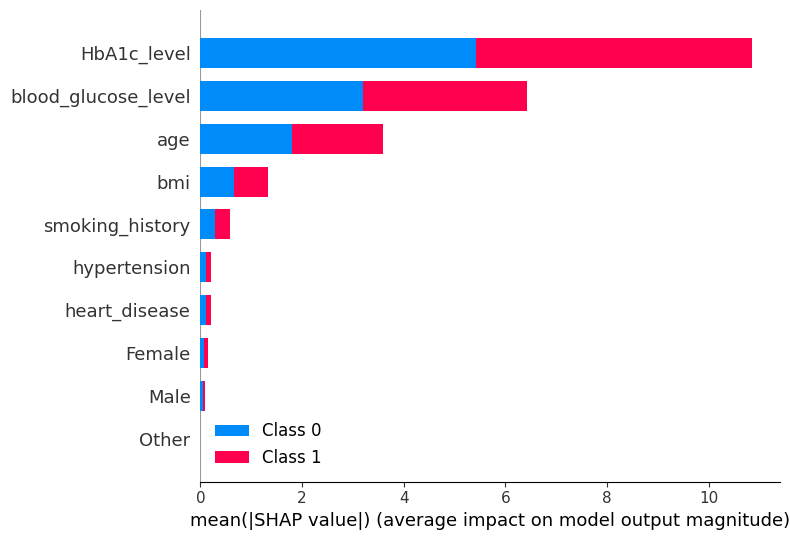

In [ ]:
import shap

best_model = lgb_bayes.best_estimator_
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type='bar')

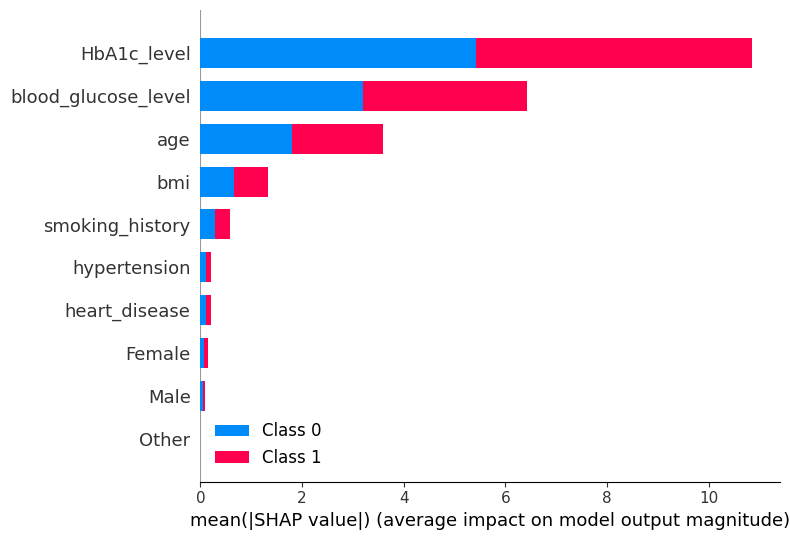

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
# Calculate probabilisitc risk of developing diabetes for all entries
diabetes_X['diabetes_probability'] = best_model.predict_proba(diabetes_X)[:, 1]
diabetes_X

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Female,Male,Other,diabetes_probability
0,1.000000,0,1,3,0.177171,0.563636,0.272727,1,0,0,7.363691e-02
1,0.675000,0,0,0,0.202031,0.563636,0.000000,1,0,0,1.744582e-06
2,0.350000,0,0,3,0.202031,0.400000,0.354545,0,1,0,1.793075e-05
3,0.450000,0,0,1,0.156863,0.272727,0.340909,1,0,0,3.763814e-07
4,0.950000,1,1,1,0.118231,0.236364,0.340909,0,1,0,7.364305e-07
...,...,...,...,...,...,...,...,...,...,...,...
182946,0.719212,1,0,3,0.338783,0.636364,0.566501,1,0,0,9.999987e-01
182947,0.725000,1,0,3,0.322930,0.651875,0.545455,1,0,0,9.999840e-01
182948,0.725000,1,0,3,0.311534,0.675866,0.545455,1,0,0,9.999884e-01
182949,0.714490,1,0,3,0.345705,0.636364,0.583671,1,0,0,9.999987e-01


## Model Production

Get final model into production through pickle library.

In [ ]:
import pickle

with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)